In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, roc_curve, precision_recall_curve,
                             roc_auc_score)

In [3]:
file_path = 'C:/Users/Sasha/ML_labs/diabetes.csv'  

df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


=== Logistic Regression ===
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549


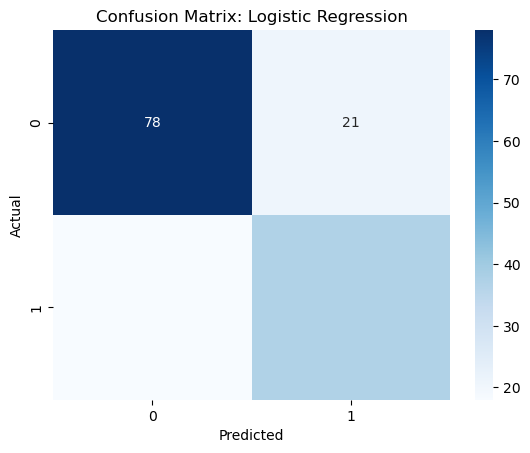


=== Decision Tree ===
Precision: 0.6250
Recall: 0.7273
F1 Score: 0.6723


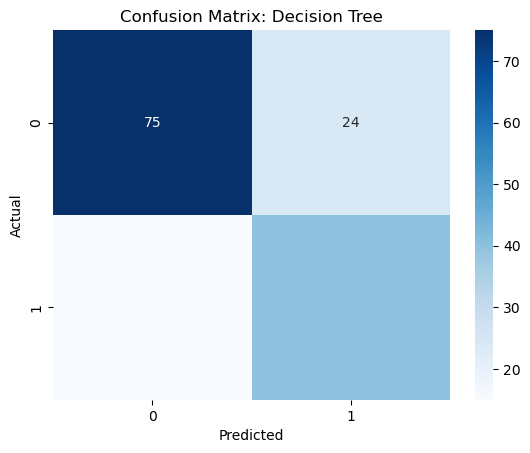

In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

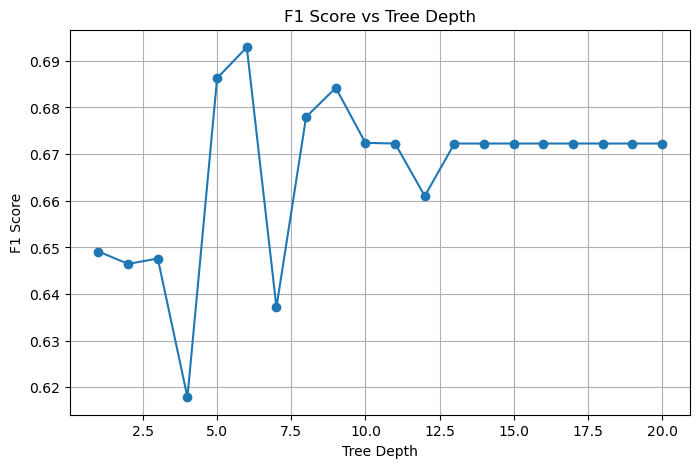

In [6]:
scores = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(depths, scores, marker='o')
plt.title('F1 Score vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


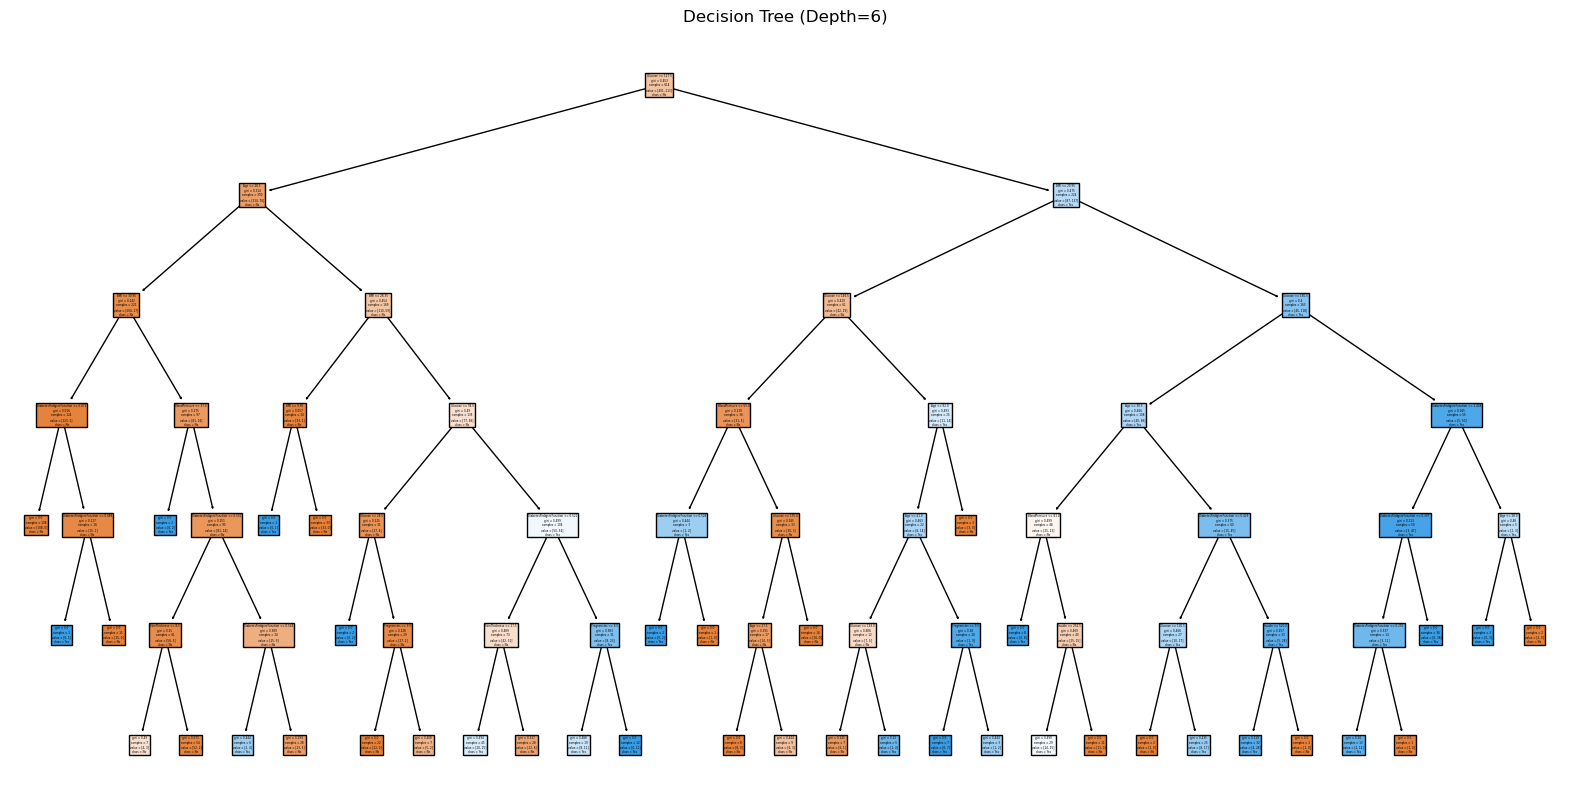

In [7]:
optimal_depth = depths[scores.index(max(scores))]
best_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title(f'Decision Tree (Depth={optimal_depth})')
plt.show()

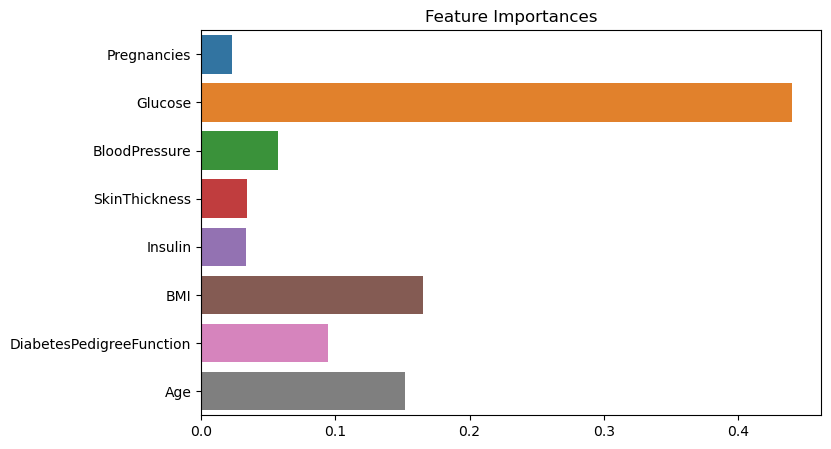

In [8]:
importances = best_tree.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances')
plt.show()

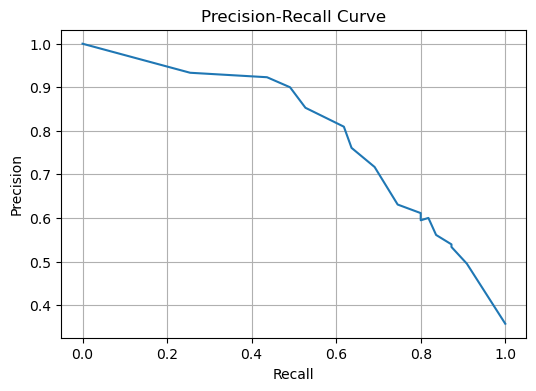

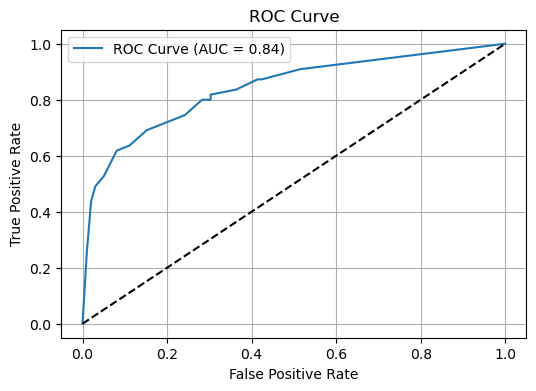

In [9]:
y_proba = best_tree.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()